In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime
%matplotlib inline

In [2]:
df_Comcast_dataset = pd.read_csv('C:\\Users\\oekpom\\Desktop\\Assignment\\Comcast_telecom_complaints_data.csv')

In [3]:
df_Comcast_dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
count = df_Comcast_dataset.groupby(['Date']).count()

In [5]:
count.head()

,Ticket #,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Date,,,,,,,,,,
04-01-15,18,18,18,18,18,18,18,18,18,18
04-02-15,27,27,27,27,27,27,27,27,27,27
04-03-15,15,15,15,15,15,15,15,15,15,15
04-04-15,12,12,12,12,12,12,12,12,12,12
04-05-15,6,6,6,6,6,6,6,6,6,6


In [6]:
count.columns

Index(['Ticket #', 'Customer Complaint', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [7]:
indices = count.index

In [8]:
x_axis = [datetime.strptime(x, '%d-%m-%y') for x in indices]

In [9]:
no_of_complaints = count.columns[0]
print(no_of_complaints)

Ticket #


In [10]:
y_axis = count[no_of_complaints]
y_axis = list((y_axis))

In [11]:
list1 = np.array(x_axis)
list2 = np.array(y_axis)
idx   = np.argsort(list1)

list1 = np.array(list1)[idx]
list2 = np.array(list2)[idx]

C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


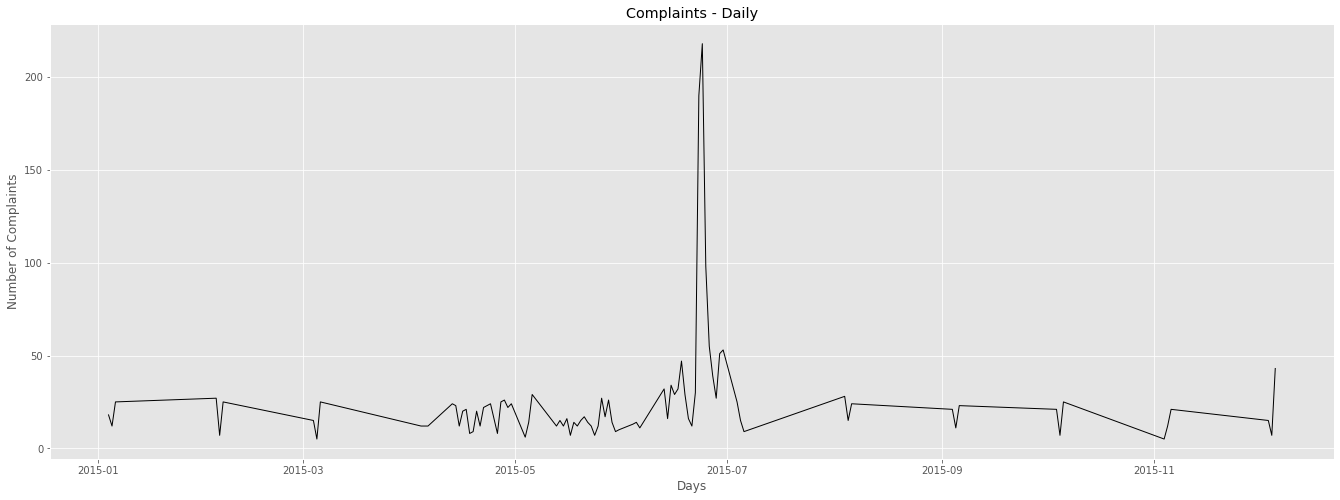

In [12]:
style.use('ggplot')
plt.figure(figsize=(23,8))
#plt.bar(list1,list2, color='b', linestyle ='-', linewidth = 1)
plt.plot(list1,list2, color='black', linestyle ='-', linewidth = 1)
plt.xlabel('Days')
plt.ylabel('Number of Complaints')
plt.title('Complaints - Daily')
plt.show()

In [13]:
months_x_axis = [x.strftime('%b') for x in list1]

In [14]:
df_month_tickets = pd.DataFrame({'Month': months_x_axis,
                   'No_of_tickets': list2}, columns=['Month', 'No_of_tickets'])

In [15]:
df_month_tickets.head()

,Month,No_of_tickets
0,Jan,18
1,Jan,12
2,Jan,25
3,Feb,27
4,Feb,7


In [16]:
df_month_tickets = df_month_tickets.groupby(['Month']).sum()

In [17]:
df_month_tickets

,No_of_tickets
Month,
Apr,375
Aug,67
Dec,65
Feb,59
Jan,55
Jul,49
Jun,1046
Mar,45
May,317


In [18]:
Months = df_month_tickets.index
Months

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object', name='Month')

In [19]:
No_of_tickets = list((df_month_tickets['No_of_tickets']))
No_of_tickets

[375, 67, 65, 59, 55, 49, 1046, 45, 317, 38, 53, 55]

In [20]:
complaints_per_month = pd.DataFrame({'Month': Months,
                   'No_of_tickets': No_of_tickets}, columns=['Month', 'No_of_tickets'])

In [21]:
complaints_per_month

,Month,No_of_tickets
0,Apr,375
1,Aug,67
2,Dec,65
3,Feb,59
4,Jan,55
5,Jul,49
6,Jun,1046
7,Mar,45
8,May,317
9,Nov,38


In [22]:
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

complaints_per_month_sorted = Sort_Dataframeby_MonthandNumeric_cols(df = complaints_per_month, monthcolumn='Month', numericcolumn='No_of_tickets')
complaints_per_month_sorted

,Month,No_of_tickets
0,Jan,55
1,Feb,59
2,Mar,45
3,Apr,375
4,May,317
5,Jun,1046
6,Jul,49
7,Aug,67
8,Sep,55
9,Oct,53


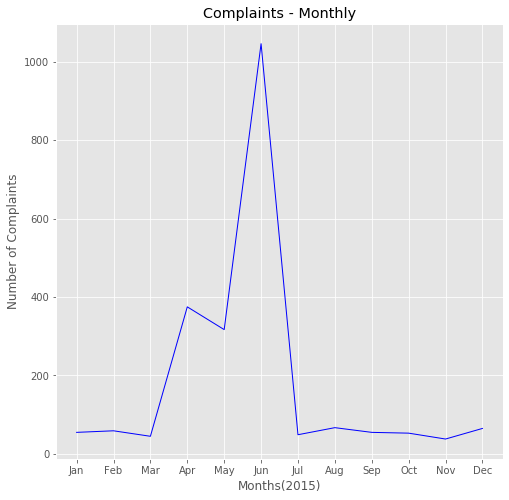

In [23]:
style.use('ggplot')
plt.figure(figsize=(8,8))
plt.plot(complaints_per_month_sorted['Month'], complaints_per_month_sorted['No_of_tickets'],color='b', linestyle ='-', linewidth = 1)
plt.xlabel('Months(2015)')
plt.ylabel('Number of Complaints')
plt.title('Complaints - Monthly')
plt.show()

In [24]:
df_Complaint_type = pd.DataFrame({'Customer Complaint': df_Comcast_dataset['Customer Complaint'],
                   'Ticket #': df_Comcast_dataset['Ticket #']}, columns=['Customer Complaint', 'Ticket #'])

In [25]:
df_Complaint_type['Customer Complaint'] = df_Complaint_type['Customer Complaint'].str.upper() 
df_Complaint_type.head()

,Customer Complaint,Ticket #
0,COMCAST CABLE INTERNET SPEEDS,250635
1,PAYMENT DISAPPEAR - SERVICE GOT DISCONNECTED,223441
2,SPEED AND SERVICE,242732
3,COMCAST IMPOSED A NEW USAGE CAP OF 300GB THAT ...,277946
4,COMCAST NOT WORKING AND NO SERVICE TO BOOT,307175


In [26]:
grouped_df_Complaint_type = df_Complaint_type.groupby(['Customer Complaint']).count().sort_values('Ticket #', ascending=False)

In [27]:
grouped_df_Complaint_type.head(1)

,Ticket #
Customer Complaint,
COMCAST,102


In [28]:
def change_status(status):
    if status == 'Open':
        return 'Open'
    elif status == 'Pending':
        return 'Open'
    elif status == 'Closed':
        return 'Closed'
    elif status == 'Solved':
        return 'Closed'
    
df_Comcast_dataset['Status'] = df_Comcast_dataset['Status'].apply(change_status)

In [29]:
df_Comcast_dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No


In [30]:
date_list =list((df_Comcast_dataset['Date']))
date_list =[datetime.strptime(x, '%d-%m-%y') for x in date_list]
#date_list =[x.strftime('%b') for x in date_list]
state_list = list((df_Comcast_dataset['State']))
status_list = list((df_Comcast_dataset['Status']))

In [31]:
list1 = np.array(date_list)
list2 = np.array(state_list)
list3 = np.array(status_list)
idx   = np.argsort(date_list)

list1 = np.array(list1)[idx]
list2 = np.array(list2)[idx]
list3 = np.array(list3)[idx]

In [32]:
date_list = list((list1))
date_list = [x.strftime('%b') for x in date_list]
state_list = list((list2))
status_list = list((list3))

In [33]:
print(date_list)

['Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar'

In [34]:
index_July = date_list.index("Jul")
print(index_July)

1897


In [35]:
index_last_sept = date_list.index("Oct") - 1
print(index_last_sept)

2067


In [36]:
date_list_Q3 = date_list[1897:2067]
state_list_Q3 = state_list[1897:2067]
status_list_Q3 = status_list[1897:2067]
count_list_Q3 = list((np.ones(170)))

In [37]:
df_state_status = pd.DataFrame({'State': state_list_Q3,
                   'Status': status_list_Q3,'Count': count_list_Q3}, columns=['State', 'Status','Count'])

In [38]:
df_state_status.head()

,State,Status,Count
0,Tennessee,Closed,1.0
1,Georgia,Closed,1.0
2,Florida,Closed,1.0
3,California,Closed,1.0
4,Georgia,Closed,1.0


In [39]:
pivot_df = df_state_status.pivot_table(index=['State'], columns='Status', values='Count',aggfunc='sum')
pivot_df

Status,Closed,Open
State,,
Alabama,2.0,NaN
California,15.0,1.0
Colorado,7.0,NaN
Connecticut,2.0,NaN
Florida,26.0,4.0
Georgia,19.0,2.0
Illinois,20.0,NaN
Indiana,4.0,NaN
Maryland,5.0,1.0


In [40]:
state = list((pivot_df.index))
closed = list((pivot_df['Closed']))
open_ = pivot_df['Open'].fillna(0)
open_ = list((open_))

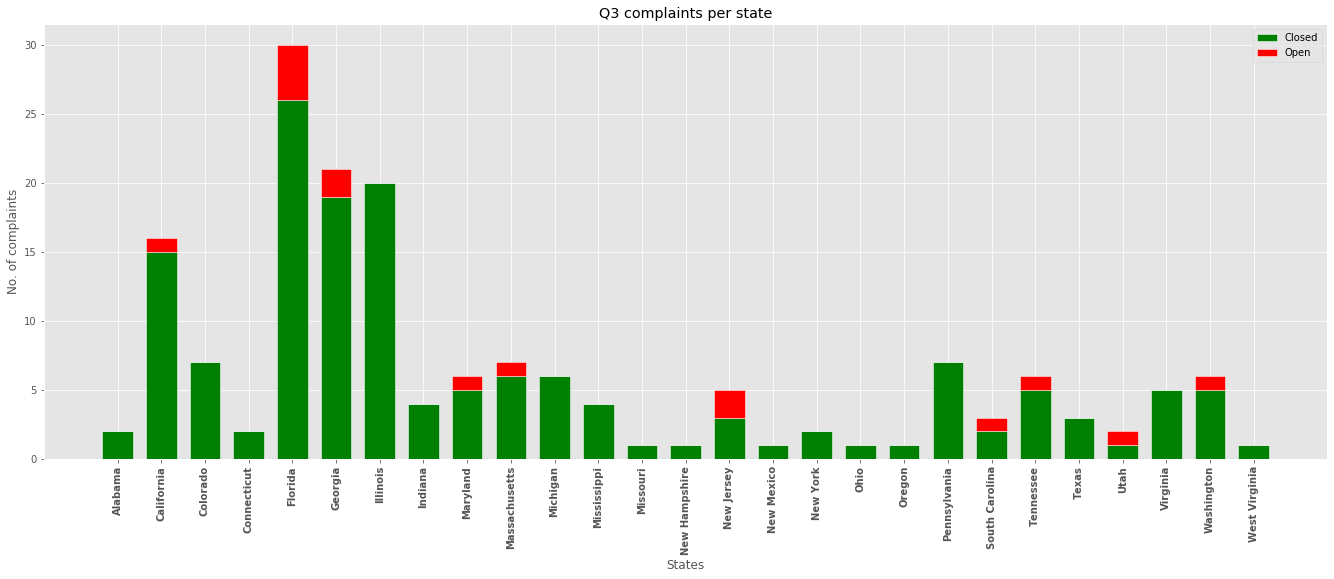

In [41]:
r = [x for x in range(27)]
style.use('ggplot')
plt.figure(figsize=(23,8))
barWidth = 0.7
plt.bar(r, closed, color='green',label='Closed', edgecolor='white', width=barWidth)
plt.bar(r, open_, bottom=closed, color='red',label='Open', edgecolor='white', width=barWidth)
plt.xticks(r, state, fontweight='bold',rotation='vertical')
plt.xlabel("States")
plt.ylabel("No. of complaints")
plt.title('Q3 complaints per state')
plt.legend()
plt.show()

In [42]:
status_list = list((df_Comcast_dataset['Status']))
Received_Via_list = list((df_Comcast_dataset['Received Via']))

In [43]:
list1 = np.array(status_list)
list2 = np.array(Received_Via_list)
idx   = np.argsort(status_list)

list1 = np.array(list1)[idx]
list2 = np.array(list2)[idx]

In [44]:
status_list = list((list1))
Received_Via_list = list((list2))
index_Open = status_list.index("Open")
print(index_Open)

1707


In [45]:
closed_Recieved_Via_list = Received_Via_list[0:1706]
df_closed_Recieved_Via = pd.DataFrame({'Received Via':closed_Recieved_Via_list})
df_closed_Recieved_Via.head()

,Received Via
0,Customer Care Call
1,Internet
2,Customer Care Call
3,Customer Care Call
4,Internet


In [46]:
Received_Via_percentage = (df_closed_Recieved_Via['Received Via'].value_counts()/df_closed_Recieved_Via['Received Via'].count())*100
Received_Via_percentage

Customer Care Call    50.644783
Internet              49.355217
Name: Received Via, dtype: float64

In [47]:
#status_list = df_Comcast_dataset['Status']
status_percentage = (df_Comcast_dataset['Status'].value_counts()/df_Comcast_dataset['Status'].count())*100
status_percentage

Closed    76.753597
Open      23.246403
Name: Status, dtype: float64

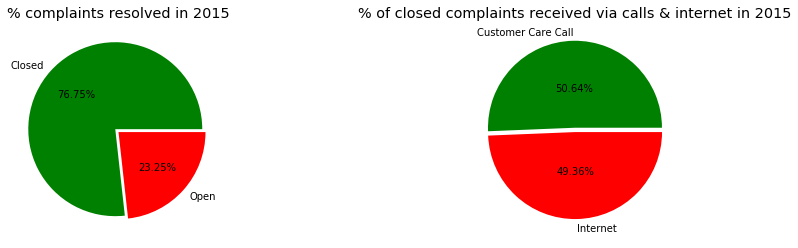

In [48]:
plt.figure(figsize=(15,4))
colors = ['green','red']
plt.subplot(1,2,1)
label1 = ['Closed', 'Open']
explode1=[0.05,0]
plt.pie(status_percentage,colors = colors, labels=label1, explode=explode1, autopct='%1.2f%%')
plt.title('% complaints resolved in 2015')
plt.subplot(1,2,2)
label2 = ['Customer Care Call', 'Internet']
explode2=[0.05,0]
plt.pie(Received_Via_percentage, colors = colors, pctdistance=0.45, labels=label2, explode=explode2, autopct='%1.2f%%')
plt.title('% of closed complaints received via calls & internet in 2015')
plt.show()